<a href="https://colab.research.google.com/github/rlalramengi/Hand_Written_Digits_Recognition/blob/main/Hand_Written_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Loading DataSet

In [ ]:
(trainX, trainY) , (testX, testY) = mnist.load_data()
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
print(trainX[30])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  11  19  95 143 143 143 143 143 143 143 143  33   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  90 149 208 253 253 253 253 253 253 253 253 253 25

In [ ]:
print(trainY[30])

3


### Normalizing Data

In [ ]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

### Ploting Data

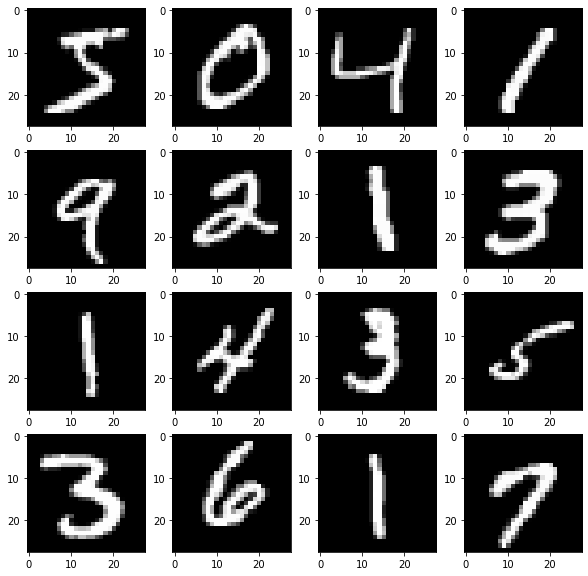

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(trainX[i], cmap = plt.get_cmap('gray'))
plt.show()

### Creating Model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3 , activation='relu', input_shape=(28,28,1))) # after applying conv layer we will get convolved feature

# After that we are going to add a max-pool layer
model.add(tf.keras.layers.MaxPool2D((2,2)))

# Creating another convolution layer
model.add(tf.keras.layers.Conv2D(filters = 48, kernel_size=3, activation='relu'))

model.add(tf.keras.layers.MaxPool2D((2,2)))

#Now we are going to add a Dropout layer
model.add(tf.keras.layers.Dropout(0.5))

#we are going to add Flatten
model.add(tf.keras.layers.Flatten())

#Now we are going to add Dense layer

model.add(tf.keras.layers.Dense(units = 500, activation='relu'))

# Adding Output layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

### Ploting Our Model

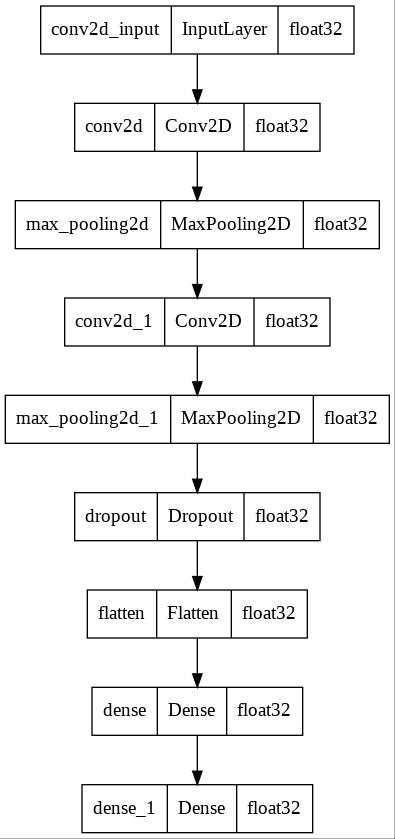

In [ ]:
tf.keras.utils.plot_model(model,'MyModel.jpg',show_dtype=True)

## Compiling Our model

In [ ]:
model.compile(optimizer='adam',  loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Traing Our Data

In [ ]:
x = model.fit(trainX, trainY, batch_size=128, epochs=10, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 41s - loss: 0.2490 - accuracy: 0.9238 - val_loss: 0.0587 - val_accuracy: 0.9835 - 41s/epoch - 98ms/step
Epoch 2/10
422/422 - 45s - loss: 0.0803 - accuracy: 0.9753 - val_loss: 0.0426 - val_accuracy: 0.9875 - 45s/epoch - 106ms/step
Epoch 3/10
422/422 - 43s - loss: 0.0607 - accuracy: 0.9807 - val_loss: 0.0320 - val_accuracy: 0.9902 - 43s/epoch - 103ms/step
Epoch 4/10
422/422 - 39s - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0308 - val_accuracy: 0.9920 - 39s/epoch - 93ms/step
Epoch 5/10
422/422 - 40s - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.0283 - val_accuracy: 0.9923 - 40s/epoch - 95ms/step
Epoch 6/10
422/422 - 39s - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.0238 - val_accuracy: 0.9942 - 39s/epoch - 92ms/step
Epoch 7/10
422/422 - 39s - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0244 - val_accuracy: 0.9933 - 39s/epoch - 94ms/step
Epoch 8/10
422/422 - 39s - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0252 - val_accuracy: 0.9927 - 39s/epoch - 92ms/ste

## Evaluating Test Set

In [ ]:
loss, accuracy = model.evaluate(testX , testY)

313/313 [==============================] - 3s 11ms/step - loss: 0.0205 - accuracy: 0.9929


# Checking Result

Model Prediction is:  0


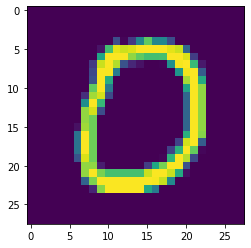

In [ ]:
plt.imshow(testX[10])
pred = model.predict(testX)
print("Model Prediction is: ", np.argmax(pred[10]))

Model Prediction is:  6


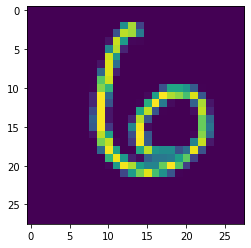

In [ ]:
plt.imshow(testX[100])
pred = model.predict(testX)
print("Model Prediction is: ", np.argmax(pred[100]))

Model Prediction is:  1


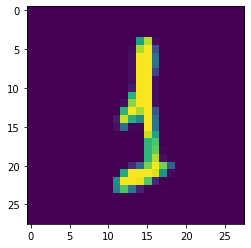

In [ ]:
plt.imshow(testX[900])
pred = model.predict(testX)
print("Model Prediction is: ", np.argmax(pred[900]))

Model Prediction is:  6


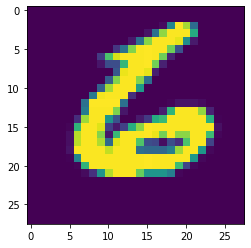

In [ ]:
plt.imshow(testX[9999])
pred = model.predict(testX)
print("Model Prediction is: ", np.argmax(pred[9999]))